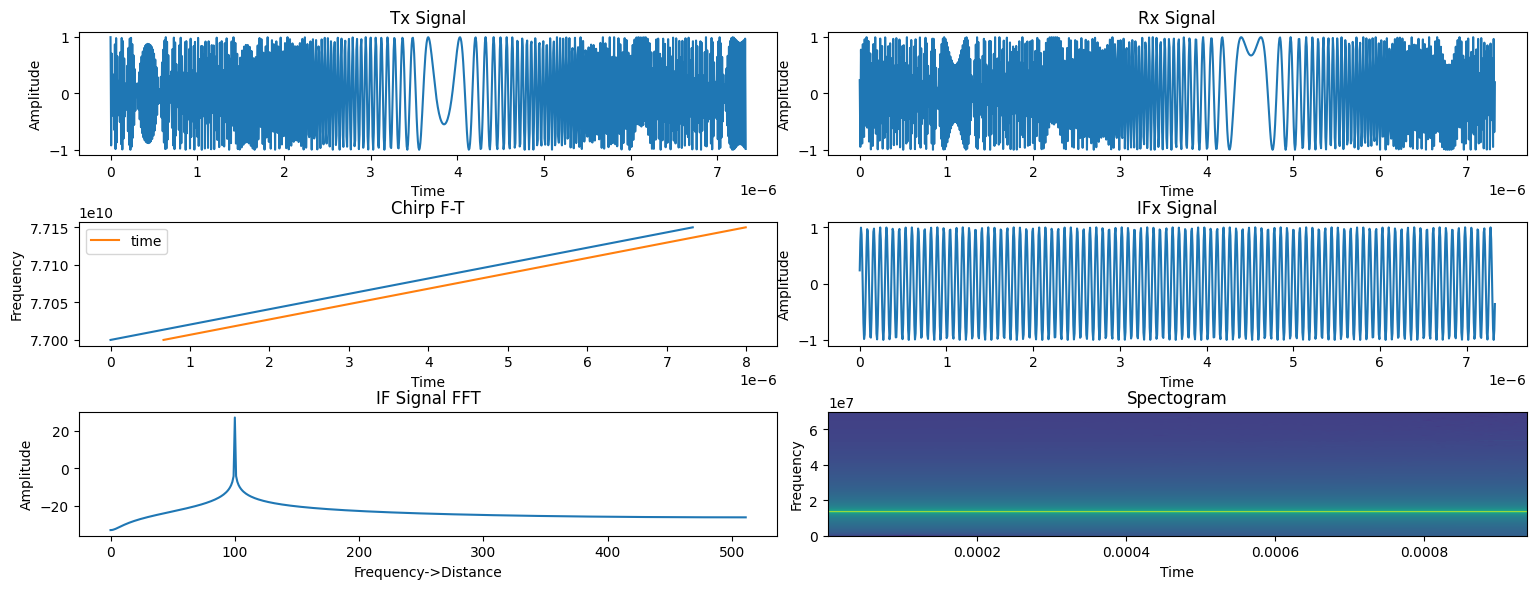

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
from mpl_toolkits.mplot3d import Axes3D

#Radar parameters setting
maxR = 200 
rangeRes = 1
maxV = 70 
fc = 77e9
c = 3e8 

r0 = 100 
v0 = 0

B = c/(2*rangeRes)
Tchirp = 5.5*2*maxR/c
endle_time = 6.3e-6
slope = B/Tchirp 
f_IFmax = (slope*2*maxR)/c
f_IF = (slope*2*r0)/c 

Nd = 128 
Nr = 1024
vres = (c/fc)/(2*Nd*(Tchirp+endle_time)) 
Fs = Nr/Tchirp 
#Tx = np.zeros(1,len(t))
#Rx = np.zeros(1,len(t)) 
#Mix = np.zeros(1,len(t)) 

#Tx波函数参数
t = np.linspace(0,Nd*Tchirp,Nr*Nd) #发射信号和接收信号的采样时间
angle_freq = fc*t+(slope*t*t)/2 #角频率
freq = fc + slope*t #频率
Tx = np.cos(2*np.pi*angle_freq) #发射波形函数
plt.figure(figsize=(16,8))
plt.subplot(4,2,1)
plt.plot(t[0:1024],Tx[0:1024])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Tx Signal')
plt.subplot(4,2,3)
plt.plot(t[0:1024],freq[0:1024])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Tx F-T')

r0 = r0+v0*t

#Rx波函数参数
td = 2*r0/c
tx = t
freqRx = fc + slope*(t)
Rx = np.cos(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2)) #接受波形函数
plt.subplot(4,2,2)
plt.plot(t[0:1024],Rx[0:1024])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Rx Signal')
plt.subplot(4,2,3)
plt.plot(t[0:1024]+td[0:1024],freqRx[0:1024],label='time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Chirp F-T')
plt.legend()

#IF信号函数参数
IF_angle_freq = fc*t+(slope*t*t)/2 - ((fc*(t-td) + (slope*(t-td)*(t-td))/2))
freqIF = slope*td
IFx = np.cos(-(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))+(2*np.pi*angle_freq))
plt.subplot(4,2,4)
plt.plot(t[0:1024],IFx[0:1024])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('IFx Signal')

#Range FFT
doppler = 10*np.log10(np.abs(np.fft.fft(IFx[0:1024])))
frequency = np.fft.fftfreq(1024, 1/Fs)
range = frequency*c/(2*slope)
plt.subplot(4,2,5)
plt.plot(range[0:512],doppler[0:512])
plt.xlabel('Frequency->Distance')
plt.ylabel('Amplitude')
plt.title('IF Signal FFT')

#2D plot
plt.subplot(4,2,6)
plt.specgram(IFx,1024,Fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram')

plt.tight_layout(pad=3, w_pad=0.05, h_pad=0.05)
plt.show()